Erro Médio Quadrático: 0.5422457311325491


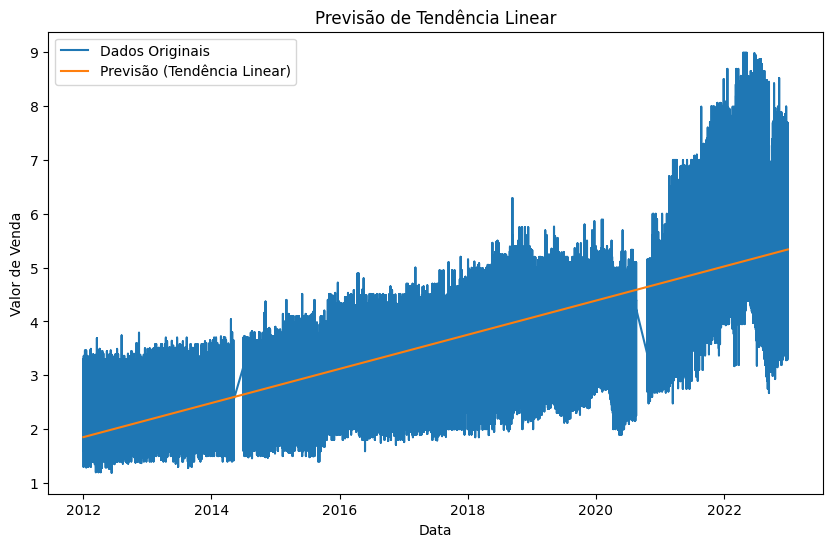

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Tabelas/amostras_df.csv', parse_dates=['Data da Coleta'])
data.set_index('Data da Coleta', inplace=True)

target_column = 'Valor de Venda'

if target_column not in data.columns:
    raise KeyError(f'A coluna "{target_column}" não foi encontrada no DataFrame.')

data['Dias'] = (data.index - data.index[0]).days

X = data['Dias'].values.reshape(-1, 1)
y = data[target_column].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print(f"Erro Médio Quadrático: {mse}")

plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(data.index, y_pred, label='Previsão (Tendência Linear)')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Previsão de Tendência Linear')
plt.legend()
plt.show()


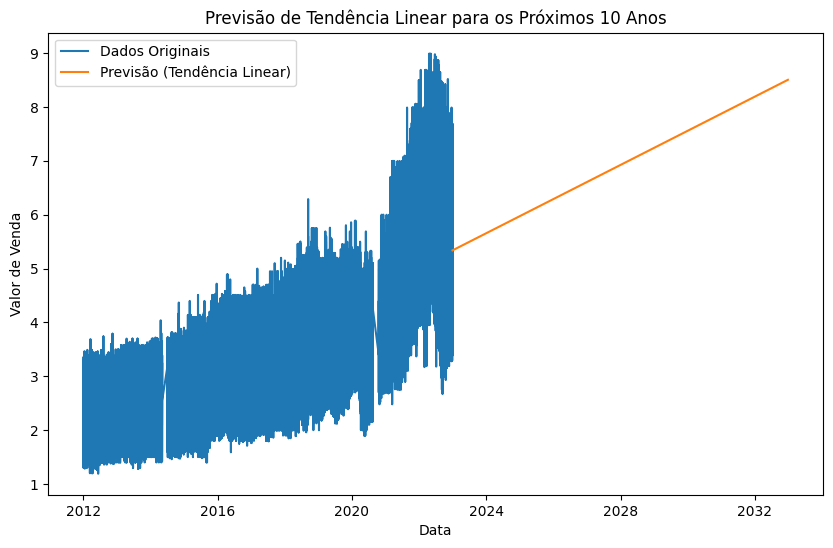

In [24]:
if target_column not in data.columns:
    raise KeyError(f'A coluna "{target_column}" não foi encontrada no DataFrame.')

data['Dias'] = (data.index - data.index[0]).days

X = data['Dias'].values.reshape(-1, 1)
y = data[target_column].values

model = LinearRegression()
model.fit(X, y)

dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
previsao_futura = model.predict(dias_futuros.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(pd.date_range(start=data.index[-1], periods=len(previsao_futura), freq='D'), previsao_futura, label='Previsão (Tendência Linear)')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Previsão de Tendência Linear para os Próximos 10 Anos')
plt.legend()
plt.show()